In [1]:
import sqlite3
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


db_path = r'C:\Users\LapTopCity\Desktop\becex\WineQT.db'
with sqlite3.connect(db_path) as connection:
    try:
        df = pd.read_sql_query("SELECT * FROM wine_quality", connection)
        df['Id'] = range(1, len(df) + 1)
        df.to_sql('wine_quality', connection, if_exists='replace', index=False)
        print("Table 'wine_quality' updated successfully.")
    except Exception as e:
        print(f"An error occurred: {e}")


Table 'wine_quality' updated successfully.


# First step is checking for any null data


In [2]:
null_count = df.isnull().sum()
print(null_count)
any_null = df.isnull().sum().any()
print(any_null)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64
False


# In Next step Number of dupplicates are counted


In [3]:

duplicates = df.duplicated()

num_duplicates = duplicates.sum()


print(f"Number of duplicate rows: {num_duplicates}")


Number of duplicate rows: 0


# using a box plot to check the whole data to see the outliers 

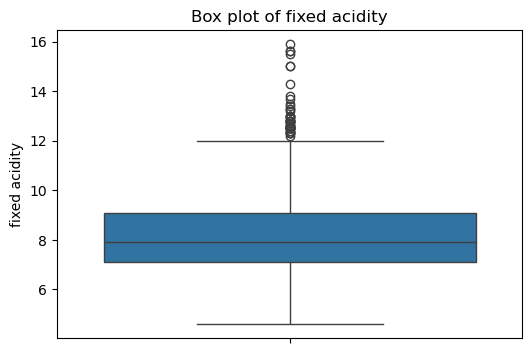

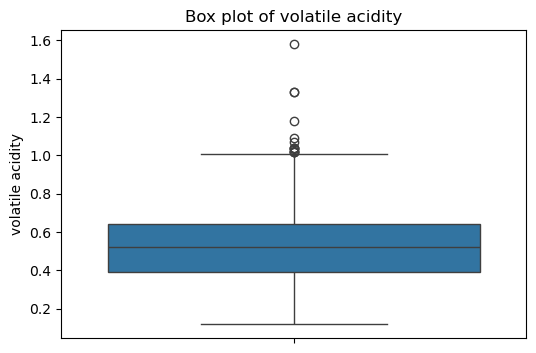

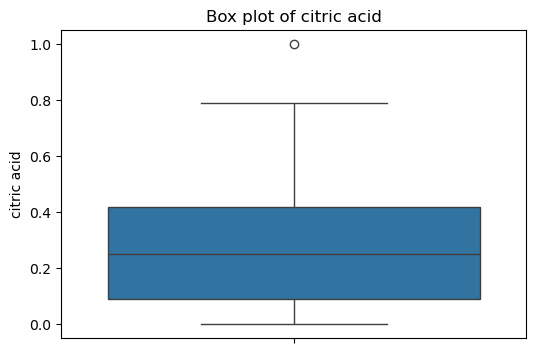

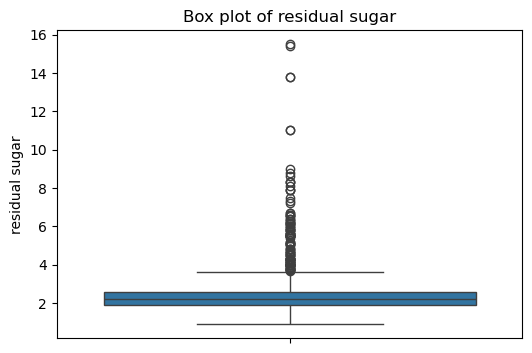

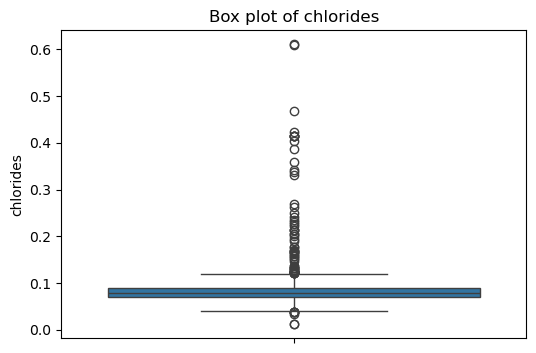

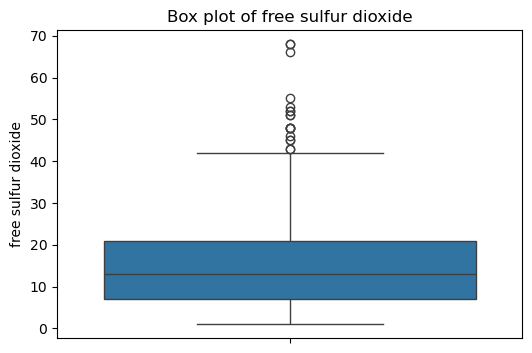

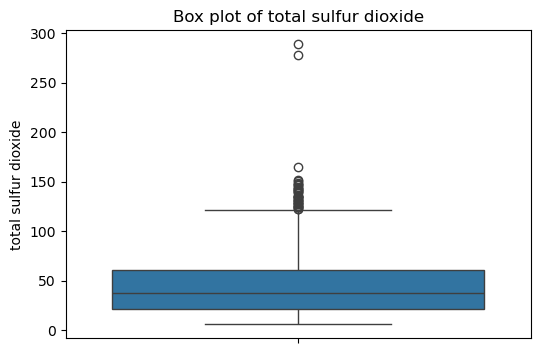

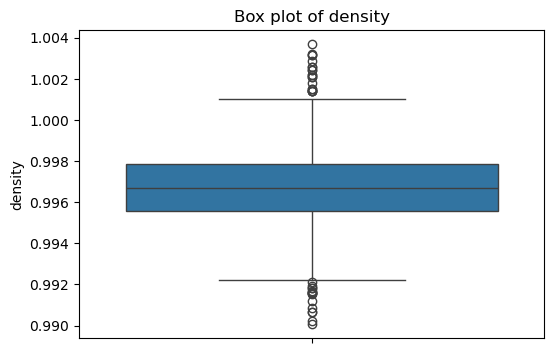

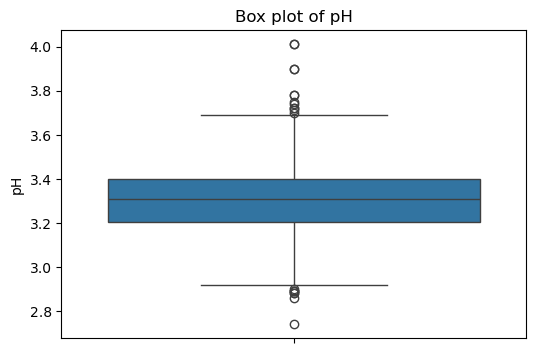

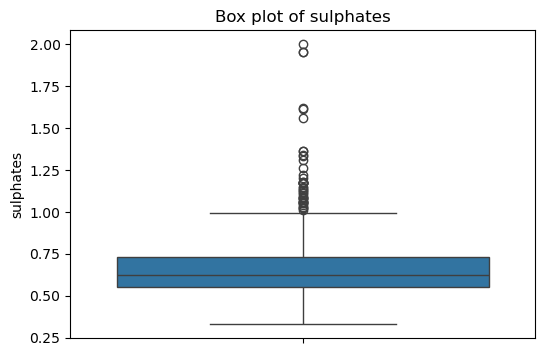

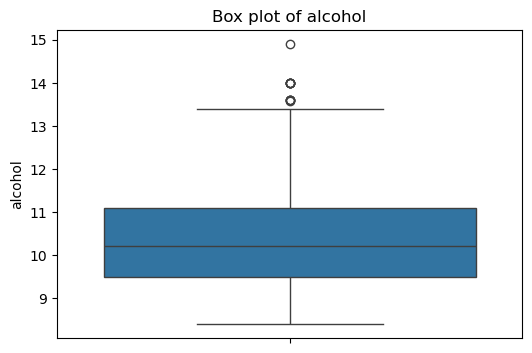

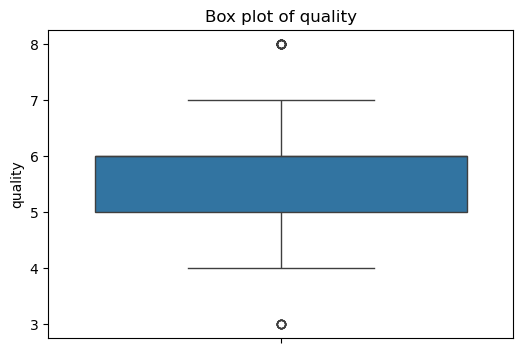

In [4]:
# Exclude the 'Id' column
import matplotlib.pyplot as plt

columns_to_plot = df.columns[df.columns != 'Id']

# Loop through each numerical column and create an individual box plot
for column in columns_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311061,0.531323,0.268360,2.532136,0.086933,15.614173,45.914698,0.996730,3.311010,0.657693,10.441943,5.657043,572.000000
std,1.747456,0.179627,0.196678,1.355851,0.047267,10.247585,32.782130,0.001925,0.156667,0.170413,1.082109,0.805824,330.099985
min,4.601562,0.119995,0.000000,0.899902,0.012000,1.000000,6.000000,0.990070,2.740234,0.330078,8.398438,3.000000,1.000000
25%,7.101562,0.392456,0.090027,1.900391,0.070000,7.000000,21.000000,0.995570,3.205078,0.549805,9.500000,5.000000,286.500000
50%,7.898438,0.520020,0.250000,2.199219,0.079000,13.000000,37.000000,0.996680,3.310547,0.620117,10.203125,6.000000,572.000000
75%,9.101562,0.640137,0.419922,2.599609,0.090000,21.000000,61.000000,0.997845,3.400391,0.729980,11.101562,6.000000,857.500000
max,15.898438,1.580078,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.011719,2.000000,14.898438,8.000000,1143.000000


# After analyzing the data using visualizations and numerical summaries, the next step is to handle outliers using the Z-score method.


In [6]:
import pandas as pd
from scipy import stats
import numpy as np

z_scores = stats.zscore(df['total sulfur dioxide'])


threshold = 1.5


high_outliers = z_scores > threshold


low_outliers = z_scores < -threshold


outliers = high_outliers | low_outliers


median_value = df['total sulfur dioxide'].median()


print("Z-Scores Range:")
print(f"Min Z-Score: {np.min(z_scores)}")
print(f"Max Z-Score: {np.max(z_scores)}")


low_outlier_values = df.loc[low_outliers, 'total sulfur dioxide']
print("Low Outliers before replacement:")
print(low_outlier_values)


high_outlier_values = df.loc[high_outliers, 'total sulfur dioxide']
print("High Outliers before replacement:")
print(high_outlier_values)

df.loc[outliers, 'total sulfur dioxide'] = median_value



updated_outlier_values = df.loc[outliers, 'total sulfur dioxide']
print("Outliers after replacement:")
print(updated_outlier_values)

df.describe()


Z-Scores Range:
Min Z-Score: -1.2181078456956762
Max Z-Score: 7.418422961238067
Low Outliers before replacement:
Series([], Name: total sulfur dioxide, dtype: float64)
High Outliers before replacement:
12      103.0
23      113.0
33      114.0
37      119.0
43      112.0
        ...  
1112    131.0
1113    131.0
1114    131.0
1124    104.0
1132     98.0
Name: total sulfur dioxide, Length: 100, dtype: float64
Outliers after replacement:
12      37.0
23      37.0
33      37.0
37      37.0
43      37.0
        ... 
1112    37.0
1113    37.0
1114    37.0
1124    37.0
1132    37.0
Name: total sulfur dioxide, Length: 100, dtype: float64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311061,0.531323,0.268360,2.532136,0.086933,15.614173,38.481627,0.996730,3.311010,0.657693,10.441943,5.657043,572.000000
std,1.747456,0.179627,0.196678,1.355851,0.047267,10.247585,21.225132,0.001925,0.156667,0.170413,1.082109,0.805824,330.099985
min,4.601562,0.119995,0.000000,0.899902,0.012000,1.000000,6.000000,0.990070,2.740234,0.330078,8.398438,3.000000,1.000000
25%,7.101562,0.392456,0.090027,1.900391,0.070000,7.000000,21.000000,0.995570,3.205078,0.549805,9.500000,5.000000,286.500000
50%,7.898438,0.520020,0.250000,2.199219,0.079000,13.000000,37.000000,0.996680,3.310547,0.620117,10.203125,6.000000,572.000000
75%,9.101562,0.640137,0.419922,2.599609,0.090000,21.000000,50.000000,0.997845,3.400391,0.729980,11.101562,6.000000,857.500000
max,15.898438,1.580078,1.000000,15.500000,0.611000,68.000000,95.000000,1.003690,4.011719,2.000000,14.898438,8.000000,1143.000000


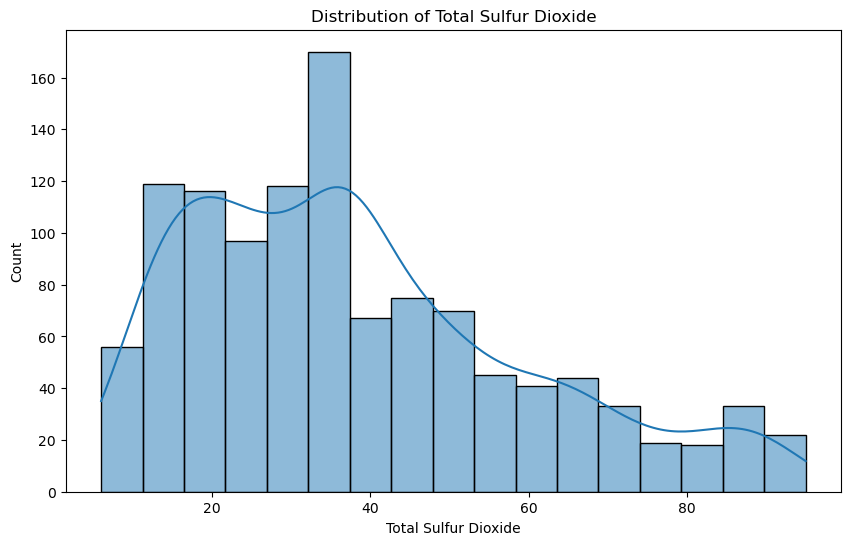

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['total sulfur dioxide'], kde=True)
plt.title('Distribution of Total Sulfur Dioxide')
plt.xlabel('Total Sulfur Dioxide')
plt.show()



# Finding the correlations between different factors affecting wine quality


Correlation with 'quality':
fixed acidity           0.121948
volatile acidity       -0.407383
citric acid             0.240822
residual sugar          0.022006
chlorides              -0.124085
free sulfur dioxide    -0.063438
total sulfur dioxide   -0.125622
density                -0.175208
pH                     -0.052238
sulphates               0.257724
alcohol                 0.484842
quality                 1.000000
Name: quality, dtype: float64


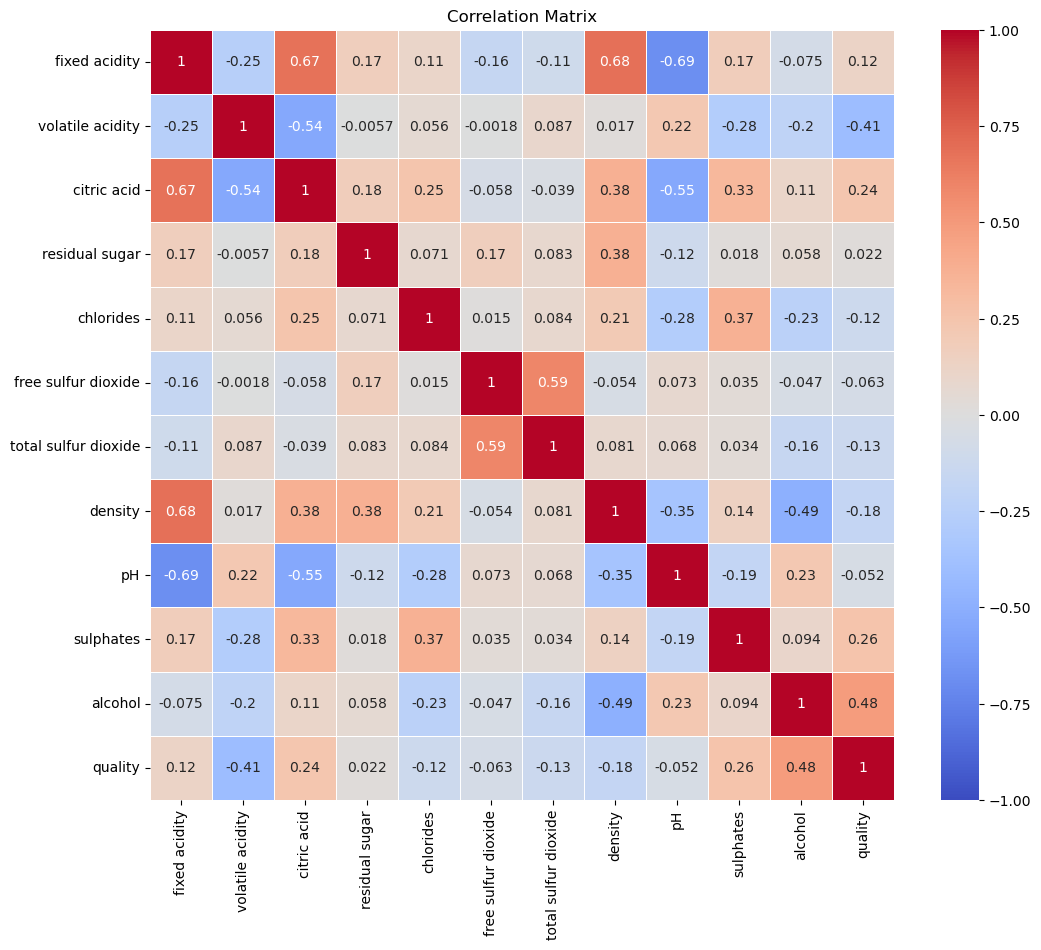

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
df_for_correlation = df.drop(columns=['Id']) if 'Id' in df.columns else df
correlation_matrix = df_for_correlation.corr()
print("Correlation with 'quality':")
print(correlation_matrix['quality'])
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Reducing the memory usage 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   int64  
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 116.2 KB


In [11]:
df['fixed acidity'] = df['fixed acidity'].astype(np.float16)
df['volatile acidity'] = df['volatile acidity'].astype(np.float16)
df['citric acid'] = df['citric acid'].astype(np.float16)
df['residual sugar'] = df['residual sugar'].astype(np.float16)
df['pH'] = df['pH'].astype(np.float16)
df['sulphates'] = df['sulphates'].astype(np.float16)
df['alcohol'] = df['alcohol'].astype(np.float16)
df['quality'] = df['quality'].astype(np.int8)
df['free sulfur dioxide'] = df['free sulfur dioxide'].astype(np.int8)
df['density'] = df['density'].astype(np.float32)
df['Id'] = df['Id'].astype(np.int16)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float16
 1   volatile acidity      1143 non-null   float16
 2   citric acid           1143 non-null   float16
 3   residual sugar        1143 non-null   float16
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   int8   
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float32
 8   pH                    1143 non-null   float16
 9   sulphates             1143 non-null   float16
 10  alcohol               1143 non-null   float16
 11  quality               1143 non-null   int8   
 12  Id                    1143 non-null   int16  
dtypes: float16(7), float32(1), float64(2), int16(1), int8(2)
memory usage: 42.5 KB


# Using a cool-warm color scheme in a heatmap to check correlations between quality and other columns


<Axes: >

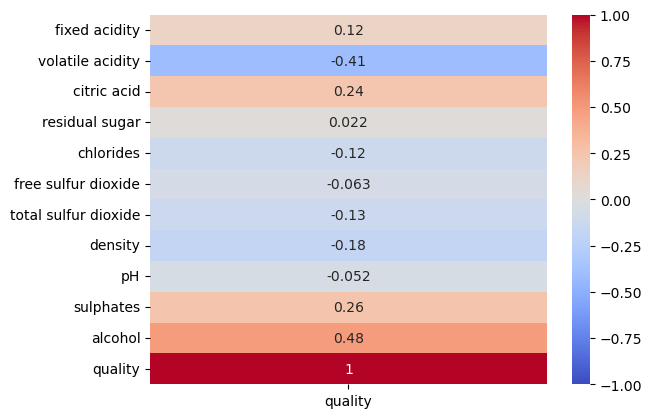

In [12]:
corr_matrix = df.corr()
quality_corr = corr_matrix['quality']
quality_corr = quality_corr.drop('Id', errors='ignore')
sns.heatmap(quality_corr.to_frame(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)



# Identifying the strong correlations between different elements


                      fixed acidity  volatile acidity  citric acid  \
fixed acidity                   NaN               NaN     0.673105   
volatile acidity                NaN               NaN    -0.544173   
citric acid                0.673105         -0.544173          NaN   
free sulfur dioxide             NaN               NaN          NaN   
total sulfur dioxide            NaN               NaN          NaN   
density                    0.681532               NaN          NaN   
pH                        -0.685079               NaN    -0.546252   
alcohol                         NaN               NaN          NaN   
quality                         NaN         -0.407383          NaN   

                      free sulfur dioxide  total sulfur dioxide   density  \
fixed acidity                         NaN                   NaN  0.681532   
volatile acidity                      NaN                   NaN       NaN   
citric acid                           NaN                   NaN     

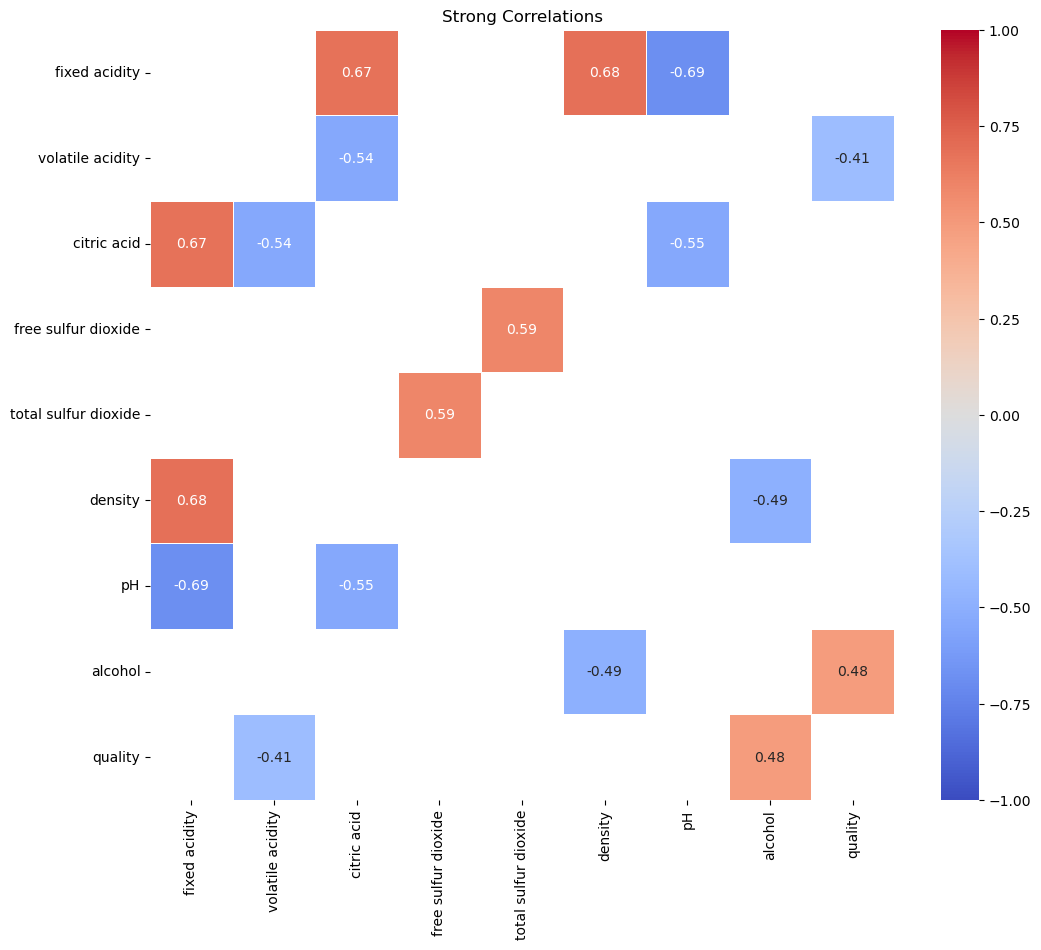

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
threshold = 0.4
strong_corrs = corr_matrix[(abs(corr_matrix) > threshold) & (abs(corr_matrix) < 1.0)]
strong_corrs_clean = strong_corrs.dropna(axis=0, how='all').dropna(axis=1, how='all')
print(strong_corrs_clean)
strong_corrs_clean.to_csv('co_relations.csv')
plt.figure(figsize=(12, 10))
sns.heatmap(strong_corrs_clean, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Strong Correlations')
plt.show()


#  Visualizing the strong correlations between different elements


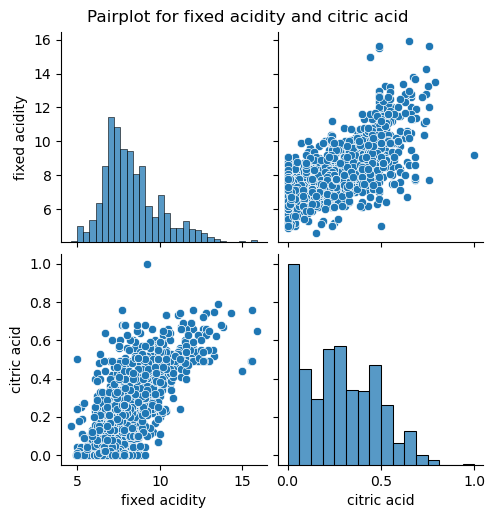

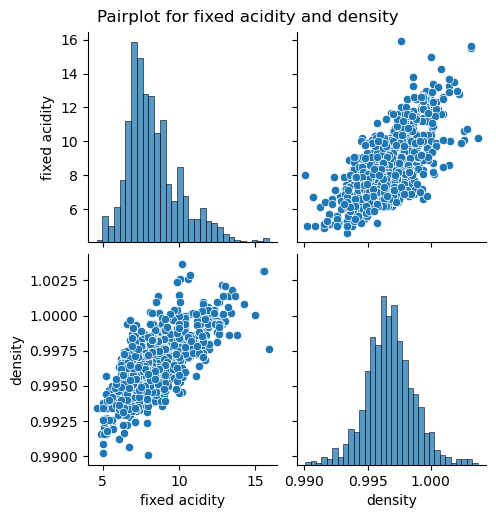

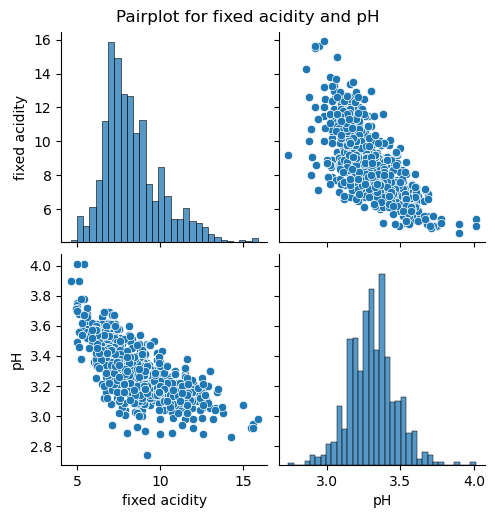

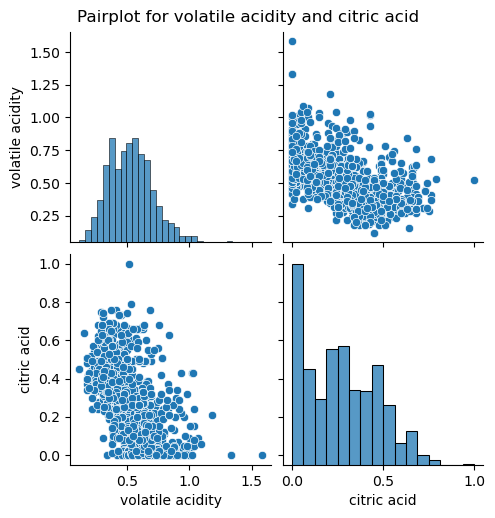

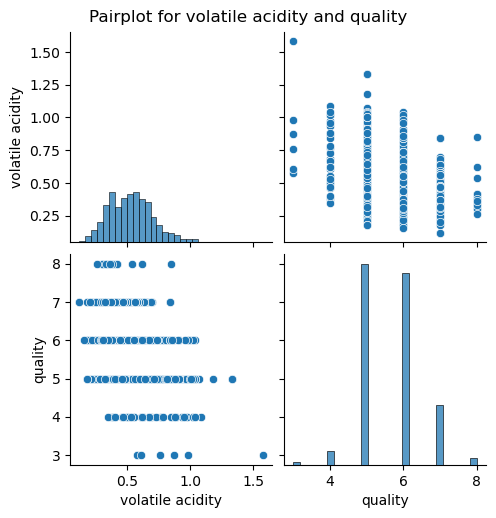

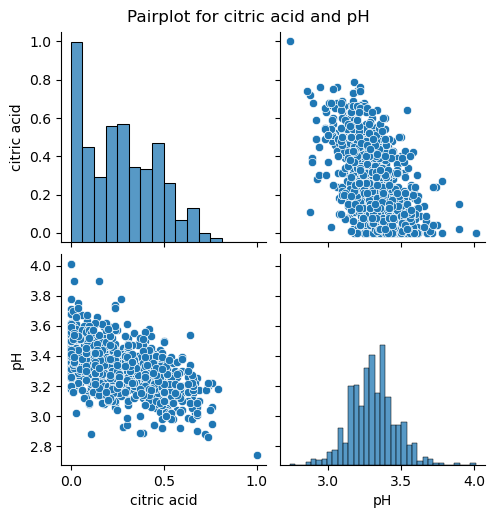

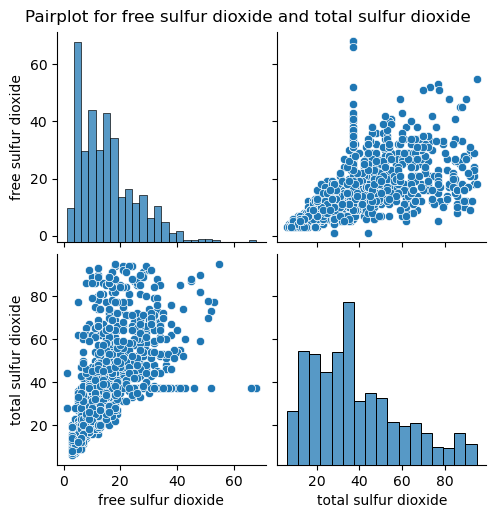

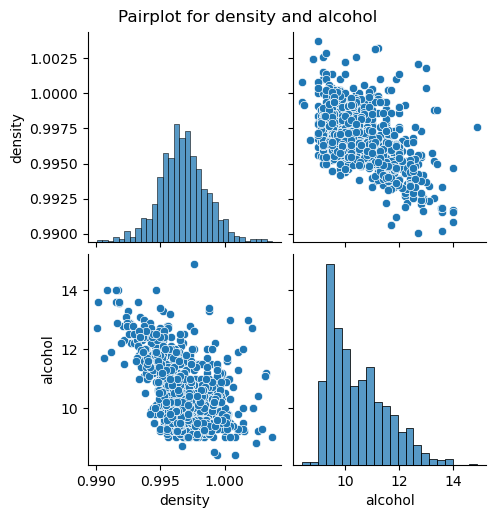

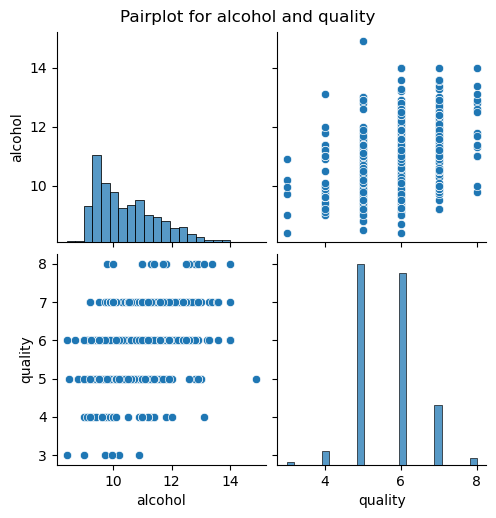

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
threshold = 0.4
strong_corrs = corr_matrix[(abs(corr_matrix) > threshold) & (abs(corr_matrix) < 1.0)]
strong_corrs_clean = strong_corrs.dropna(axis=0, how='all').dropna(axis=1, how='all')
for i, col1 in enumerate(strong_corrs_clean.columns):
    for col2 in strong_corrs_clean.columns[i+1:]:
        if not pd.isna(strong_corrs_clean.loc[col1, col2]):
            
            pair_data = df[[col1, col2]].dropna()
            sns.pairplot(pair_data)
            plt.suptitle(f'Pairplot for {col1} and {col2}', y=1.02)
            plt.show()


# feature extraction 

# performing feature engineering and model training for predicting wine quality.
# 
# The following new features are created by summing relevant columns:
# - 'quality_volatile_acidity': Combines quality and volatile acidity.
# - 'alcohol_density': Combines alcohol and density.
# - 'pH_citric_acid': Combines pH and citric acid.
# - 'pH_fixed_acidity': Combines pH and fixed acidity.
# - 'density_fixed_acidity': Combines density and fixed acidity.
# - 'total_sulfur_dioxide_free_sulfur_dioxide': Combines total and free sulfur dioxide.
# - 'citric_acid_volatile_acidity': Combines citric acid and volatile acidity.
# - 'fixed_acidity_citric_acid': Combines fixed acidity and citric acid.
#
# These newly created features are added to the DataFrame and included in the list of features for model training.
#
# The model is then split into training and testing datasets (70/30 split).
# A Linear Regression model is trained on the training data, and its performance is evaluated 
# using Mean Squared Error (MSE) and R-squared metrics on the test set.
# The coefficients and intercept of the linear model are printed for analysis.
#
# Additionally, a Support Vector Regression (SVR) model is implemented with hyperparameter tuning 
# using GridSearchCV to find the best parameters for the SVR model.
# The performance of the tuned SVR model is evaluated using the same metrics (MSE and R-squared).
#
# Results from both models are printed for comparison.


In [ ]:
df['quality_volatile_acidity'] = df['quality'] + df['volatile acidity']
df['alcohol_density'] = df['alcohol'] + df['density']
df['pH_citric_acid'] = df['pH'] + df['citric acid']
df['pH_fixed_acidity'] = df['pH'] + df['fixed acidity']
df['density_fixed_acidity'] = df['density'] + df['fixed acidity']
df['total_sulfur_dioxide_free_sulfur_dioxide'] = df['total sulfur dioxide'] + df['free sulfur dioxide']
df['citric_acid_volatile_acidity'] = df['citric acid'] + df['volatile acidity']
df['fixed_acidity_citric_acid'] = df['fixed acidity'] + df['citric acid']

feature_columns = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
    'quality_volatile_acidity', 'alcohol_density', 'pH_citric_acid', 'pH_fixed_acidity',
    'density_fixed_acidity', 'total_sulfur_dioxide_free_sulfur_dioxide',
    'citric_acid_volatile_acidity', 'fixed_acidity_citric_acid'
]

X = df[feature_columns]
y = df['quality']

svr_model = SVR()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear_test = mean_squared_error(y_test, y_pred_linear)
r2_linear_test = r2_score(y_test, y_pred_linear)
coefficients = pd.Series(linear_model.coef_, index=feature_columns)
intercept = linear_model.intercept_

print("Linear Regression Results:")
print(f"Mean Squared Error: {mse_linear_test}")
print(f"R-squared: {r2_linear_test}")
print("Coefficients:")
print(coefficients)
print(f"Intercept: {intercept}")


param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf']
}

grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_svr_model = grid_search.best_estimator_

y_pred_svr = best_svr_model.predict(X_test)
mse_svr_test = mean_squared_error(y_test, y_pred_svr)
r2_svr_test = r2_score(y_test, y_pred_svr)

print(f"Best Parameters: {best_params}")
print(f"Test Set Mean Squared Error: {mse_svr_test}")
print(f"Test Set R-squared: {r2_svr_test}")


Linear Regression Results:
Mean Squared Error: 1.4927258021534764e-06
R-squared: 0.9999974326399348
Coefficients:
fixed acidity                               3.507705e+02
volatile acidity                           -1.478875e+00
citric acid                                -4.411907e-01
residual sugar                             -6.894096e-06
chlorides                                   6.808136e-04
free sulfur dioxide                        -8.342687e-06
total sulfur dioxide                        1.340613e-06
density                                     4.110596e+01
pH                                          8.819884e-02
sulphates                                   3.332060e-04
alcohol                                    -3.096496e+02
quality_volatile_acidity                    1.000050e+00
alcohol_density                             3.096496e+02
pH_citric_acid                             -5.472717e-02
pH_fixed_acidity                           -3.370757e-02
density_fixed_acidity          